Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". DO NOT edit cells except the one containing `YOUR CODE HERE` or "YOUR ANSWER HERE".  
Make sure you fill  your name and student number below:

In [33]:
NAME = "Lukas Franz"
STUDENT_NUMBER = "23501307"

---

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.testing import assert_allclose as nassert


# Math 406: Ass. 1: Due Thursday 30 April.
## 0. Instructions.
Please code all your function using numpy arrays (floats  64) or floats as input and output. You can use all numpy functions for linear algebra, but no fancy library. Please do not change the global variables($x_k,x_{test}$...) and don't use the $=$ sign to do a copy with them (it is not a deepcopy), but rather use `x=np.array(x_test)`. Please add titles and labels (x and y axis) to every figure. For non-code answers, you can type simple latex expressions ([Link](https://ashki23.github.io/markdown-latex.html)).



## 1. Lagrange interpolating polynomial.

(a) Define the Lagrange interpolating basis functions $l_{0}^{(5)}(x)$ and $
l_{4}^{(5)}(x)$ $(0<x<1)$, generated using the points 



In [35]:
x_k = np.array([0,0.2,0.35,0.5,1, 1.25])

(by convention $l_{0}^{(5)}$ is defined on the first point). Use markers to highlight points $x_{k}$ on the plots. Evaluate the functions on the following points (the evaluation should be numpy array of the same shape):

In [36]:
x_test =  np.linspace(0,2,1001)

In [37]:
# Evaluation function 

def eval_l05(x_test=x_test):
    res = np.ones_like(x_test)
    # YOUR CODE HERE
    j = 0

    for k in range(len(x_k)):
        if k != j:
            res *= (x_test - x_k[k]) / (x_k[j] - x_k[k])

    return res # this is the evaluation on x_test, it should be a  numpy array of shape (1,1001)

def eval_l45(x_test=x_test):
    res = np.ones_like(x_test)
    # YOUR CODE HERE
    j = 4

    for k in range(len(x_k)):
        if k != j:
            res *= (x_test - x_k[k]) / (x_k[j] - x_k[k])

    return res # this is the evaluation on x_test, it should be a  numpy array of shape (1,1001)


Plot under :



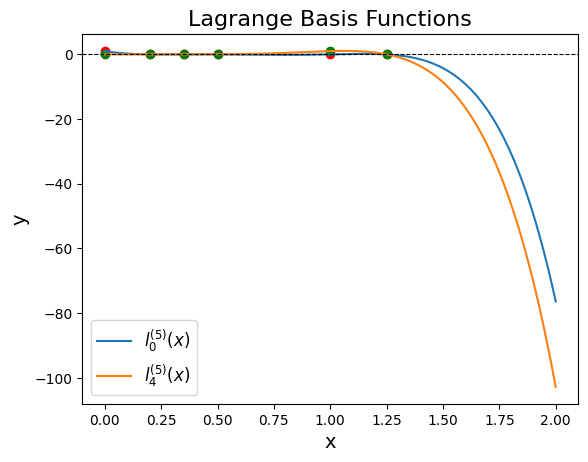

In [38]:
# YOUR CODE HERE
plt.plot(x_test, eval_l05(), label=r"$l_0^{(5)}(x)$")
plt.scatter(x_k, eval_l05(x_k), color="r")

plt.plot(x_test, eval_l45(), label=r"$l_4^{(5)}(x)$")
plt.scatter(x_k, eval_l45(x_k), color="g")

# TODO mark the points that matter
plt.title("Lagrange Basis Functions", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(fontsize=12)

plt.show()


In [39]:
#Testing answer 

(b) Define and plot the Lagrange interpolating polynomial $p_{4}(x)(0<x<1)$ that passes
through the points $(x_{k},f(x_{k})),$ $f(x)=e^{x}\cos(x^2)$, and evaluate it on $x_{\text{test}}$. You can use the functions `np.exp` and `np.cos` ([Link](https://numpy.org/doc/2.1/reference/generated/numpy.exp.html)).

In [40]:
def f(x):
    return np.cos(x**2)*np.exp(x)

def l(j, x_k, x_test):
    res = np.ones_like(x_test)
    # YOUR CODE HERE
    for k in range(len(x_k)):
        if k != j:
            res *= (x_test - x_k[k]) / (x_k[j] - x_k[k])

    return res # this is the evaluation on x_test, it should be a  numpy array of shape (1,1001)


# Evaluation function
def eval_p4():
    res = 0
    x_4 = np.array([0.2, 0.4, 0.6, 0.8])
    f_sample = f(x_4)
    l_samples = np.array([l(j, x_4, x_test) for j in range(len(x_4))])

    res = np.dot(f_sample, l_samples)

    return res



Plot under :

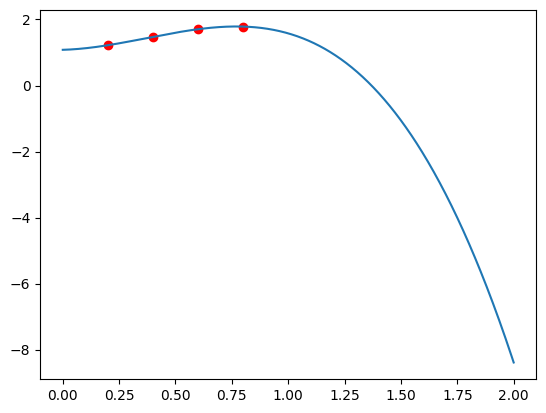

In [41]:
# YOUR CODE HERE
x_4 = np.array([0.2, 0.4, 0.6, 0.8])
plt.plot(x_test, eval_p4())
plt.scatter(x_4, f(x_4), color="r")
plt.show()

In [42]:
#Testing answer 

## Chebychev Points: 
The so-called Chebychev points 
$$x_{j}=\cos (j\pi /N),\quad j=0,1,\ldots ,N,$$

which are the points at which the Chebychev polynomials take on extreme
values in $[-1,1]$ , are commonly used in spectral
approximations for non-periodic functions. Check that the polynomials take on extreme values at those points:


Solution : 



Use the `np.polyfit` function ([Link](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html))
to interpolate the function $f_1(x)=\frac{1}{1+56x^{4}}$ at the points 


In [43]:
x_ch = np.linspace(-1,1,10)

Evaluate and plot the interpolating function on 

In [44]:
x_i = np.linspace(-1,1,1001)


In [45]:
def f(x):
    return 1 / (1+56*(x**4))


# Evaluation function
def eval_ch1():
    res = np.zeros_like(x_i)
    deg = len(x_ch) # TODO determine what deg
    # YOUR CODE HERE
    consts = np.polyfit(x_ch, f(x_ch), deg)[::-1]

    for i in range(len(consts)):
        res += pow(x_i, i) * consts[i]
        
    return res 


YOUR ANSWER HERE

/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_38564/2574154957.py:10: RankWarning: Polyfit may be poorly conditioned
  consts = np.polyfit(x_ch, f(x_ch), deg)[::-1]


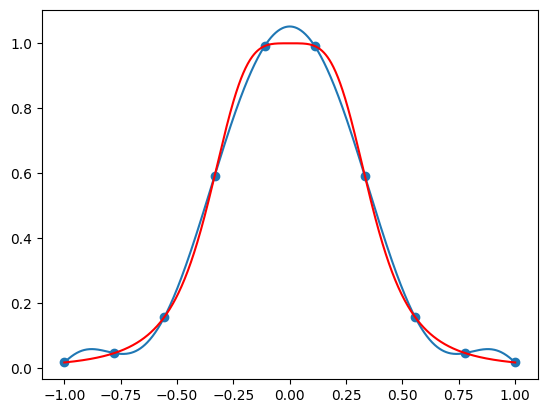

In [46]:
# YOUR CODE HERE
plt.plot(x_i, eval_ch1())
plt.plot(x_i, f(x_i), color="r")
plt.scatter(x_ch, f(x_ch))
plt.show()

In [47]:
#Testing answer 


Now use the `np.polyfit` function to
interpolate the same function at the Chebychev points for $N=9$. you can use the function `np.cos` and the number `np.pi`. Evaluate the obtained function on $x_i$. Plot these interpolants and the errors at the $x_i$. 

In [48]:
def get_chebychev_nodes(N):
    k = np.arange(0,N)
    return np.cos(np.pi*(2*k + 1)/(2*N))

# Evaluation function
def eval_ch2():
    res = np.zeros_like(x_i)
    x_ch = get_chebychev_nodes(9)
    deg = len(x_ch) # TODO determine what deg
    # YOUR CODE HERE
    consts = np.polyfit(x_ch, f(x_ch), deg)[::-1]

    for i in range(len(consts)):
        res += pow(x_i, i) * consts[i]
        
    return res 


Plot under :



/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_38564/4253108833.py:11: RankWarning: Polyfit may be poorly conditioned
  consts = np.polyfit(x_ch, f(x_ch), deg)[::-1]


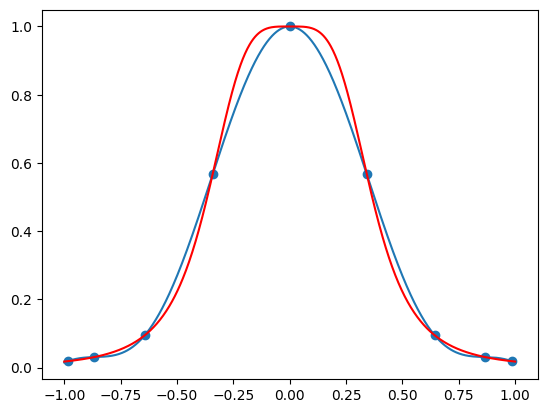

In [49]:
# YOUR CODE HERE
x_ch = get_chebychev_nodes(9)
plt.plot(x_i, eval_ch2())
plt.plot(x_i, f(x_i), color="r")
plt.scatter(x_ch, f(x_ch))
plt.show()

In [50]:
#Testing answer 
print(f"Linearly spaced sample points MSE: {((eval_ch1() - f(x_i))**2).mean()}")
print(f"Chebychev node sample points MSE: {((eval_ch2() - f(x_i))**2).mean()}")

Linearly spaced sample points MSE: 0.001471600566645519
Chebychev node sample points MSE: 0.001471600566645519


/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_38564/2574154957.py:10: RankWarning: Polyfit may be poorly conditioned
  consts = np.polyfit(x_ch, f(x_ch), deg)[::-1]
/var/folders/tf/v99lmlx935dbd8d_7_l32x0w0000gn/T/ipykernel_38564/4253108833.py:11: RankWarning: Polyfit may be poorly conditioned
  consts = np.polyfit(x_ch, f(x_ch), deg)[::-1]


How do these interpolants and their
errors compare?

The MSE of each set of approximations are the same but visually the second solution looks like it fits much better since it has less wobble near the edges of the range.


## Quadratic spline: 

Consider interpolating a function $f(x)$ by
a Piecewise Quadratic Spline interpolant $Q(x).$ At the three points $
\left\{ x_{k-1},x_{k},x_{k+1}\right\} $ at which the function assumes values 
$\left\{ f_{k-1}=f(x_{k-1}),f_{k}=f(x_{k}),f_{k+1}=f(x_{k+1})\right\} $
consider the two piecewise quadratic polynomials $Q_{k-1}(x)$ on $
[x_{k-1},x_{k}]$ and $Q_{k}(x)$ on $[x_{k},x_{k+1}]$ that make up $Q(x).$
The two quadratic polynomials must be continuous and have continuous first
derivatives at the common node $x_{k}.$ Assume the following expressions for 
$Q_{k-1}^{\prime }(x)=\frac{d}{dx}Q_{k-1}(x)$ and $Q_{k}^{\prime }(x)$ in
terms of the piecewise linear basis functions

\begin{align}
Q_{k-1}^{\prime }(x) &= \frac{s_{k-1}^{\prime }}{h_{k-1}}\left(x_{k}-x\right) +\frac{s_{k}^{\prime }}{h_{k-1}}\left( x-x_{k-1}\right) \text{for }x\in [ x_{k-1},x_{k}] \\
Q_{k}^{\prime }(x) &= \frac{s_{k}^{\prime }}{h_{k}}\left( x_{k+1}-x\right) + \frac{s_{k+1}^{\prime }}{h_{k}}\left( x-x_{k}\right) \text{ for }x\in [ x_{k},x_{k+1}]
\end{align}


where $h_{k-1}=x_{k}-x_{k-1}$ and $h_{k}=x_{k+1}-x_{k}.$ Integrate these
expressions to determine equations for $Q_{k-1}(x)$ and $Q_{k}(x)$ :


\begin{gather}
    \int Q_{k-1}^{\prime }(x) \, dx 
    &=& Q_{k-1}(x) 
    &=& -\frac{s_{k-1}^{\prime }}{2h_{k-1}}\left(x_{k}-x\right)^2 +\frac{s_{k}^{\prime }}{2h_{k-1}}\left(x-x_{k-1}\right)^2 + c_1
    \\
    \int Q_{k}^{\prime }(x) \, dx 
    &=& Q_{k}(x) 
    &=& -\frac{s_{k}^{\prime }}{2h_{k}}\left( x_{k+1}-x\right)^2 + \frac{s_{k+1}^{\prime }}{2h_{k}}\left( x-x_{k}\right)^2 + c_2
\end{gather}


Now impose the continuity of $Q_{k-1}$ and $Q_{k}$ and continuity of their first
derivatives at $x_{k},$ and the interpolation conditions
$$
Q_{k-1}(x_{k-1})=f_{k-1},\text{ }Q_{k-1}(x_{k})=f_{k}=Q_{k}(x_{k}),\text{ }
Q_{k}(x_{k+1})=f_{k+1}
$$
Express the $s_{i}^{\prime }$ in terms of $f[x_{k},x_{k+1}]$.


\begin{gather*}
    Q_{k-1}(x_k) = f_k &=& \frac{s_{k}^{\prime }}{2h_{k-1}}\left(x_k-x_{k-1}\right)^2 + c_1 
    &\implies& c_1 = f_k - \frac{h_{k-1} s_{k}^{\prime }}{2} \\
    Q_{k}(x_k) = f_k &=& -\frac{s_{k}^{\prime }}{2h_{k}}\left( x_{k+1}-x_k\right)^2 + c_2 
    &\implies& c_2 = f_k + \frac{h_{k} s_{k}^{\prime }}{2} \\
    Q_{k}(x_{k+1}) = f_{k+1} &=&  \frac{s_{k+1}^{\prime }}{2h_{k}}\left( x_{k+1}-x_{k}\right)^2 + c_2 &=& \frac{h_k s_{k+1}^{\prime }}{2} + f_k + \frac{h_{k} s_{k}^{\prime }}{2} \\
\end{gather*}

\begin{gather*}
    \implies f_{k+1} - f_k = \frac{h_k}{2} (s_{k+1}^\prime + s_k^\prime) \implies s^\prime_{k+1} = 2f[x_k, x_{k+1}] - s_{k}^\prime
\end{gather*}

\begin{gather*}
    Q_{k-1}(x_{k-1}) = -\frac{s_{k-1}^\prime}{2h_{k-1}}(x_k-x_{k-1})^2 + f_k - \frac{h_{k-1} s_{k}^{\prime }}{2}  = f_{k-1}\\
    \implies 2f[x_{k-1}, x_k] = s_{k-1}^\prime - s_k^\prime \implies s_k^\prime = s_{k-1}^\prime - 2f[x_{k-1}, x_k]
\end{gather*}


By imposing the additional boundary condition $s_{1}^{\prime }=f^{\prime
}(x_{1})$ write down a system of equations to determine $\left\{
s_{k}^{\prime }\right\} _{k=1}^{N}.$ Now write a python function to evaluate
the $Q(x)$ and $Q^\prime (x)$: 
\begin{equation*}
\mathtt{\lbrack Q,Qp]=Qspline(x,f,fp(x(1)),xi),}
\end{equation*}
in which $\mathtt{x=[x}_{1},\cdots ,\mathtt{x}_{N}$]$\mathtt{,f=[f}
_{1},\cdots ,\mathtt{f}_{N}$], $\mathtt{fp(1)}=f^{\prime }(x_{1})$ are the
specified sample points and $f$ values and the value of $f^{\prime }$ at the
left endpoint, and $\mathtt{xi}$ are the points at which we want to
interpolate $f.$


In [234]:
def Qspline(x,f,fp,xi):
    Q = []
    Qp = []

    N = len(x) - 1
    
    s = np.zeros(N+1)
    s[0] = fp
    for k in range(1, len(x)):
        s[k] = 2*(f[k] - f[k-1]) / (x[k] - x[k-1]) - s[k-1]

    for a in xi:
        k = min(max(np.searchsorted(x, a)-1, 0), N-1)
        x_k = x[k]
        x_k1 = x[k+1]
        h_k = x_k1 - x_k
        s_k = s[k]
        s_k1 = s[k+1]
        f_k = f[k]
        # print(f_k - h_k*s_k/2 + s_k/(2*h_k) * ((x_k1 - a)**2) + s_k1/(2*h_k)*((a - x_k)**2))
        Q.append(f_k + h_k*s_k/2 - s_k * (x_k1 - a)**2/(2*h_k) + s_k1*(a - x_k)**2/(2*h_k))
        Qp.append(s_k/h_k * (x_k1 - a) + s_k1/h_k* (a-x_k))
    
    return Q, Qp

For the function $f(x)=x^3\cos x$ on the interval $[0,\pi ]$ compare $Q(x)$ to
the function $f$ in one plot and $Q^{\prime }(x)$ to $f^{\prime }$ in a
separate plot. Use $N=4$ sample points in one set of plots and $N=8\,$
sample points in a second set of plots. Plot using:

In [241]:
def f(x):
    return x**3 *np.cos(x)

def fp(x):
    return 3*x**2*np.cos(x) - x**3 * np.sin(x)

Plot under :


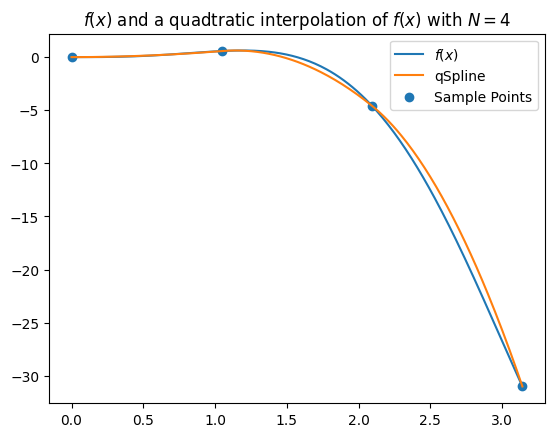

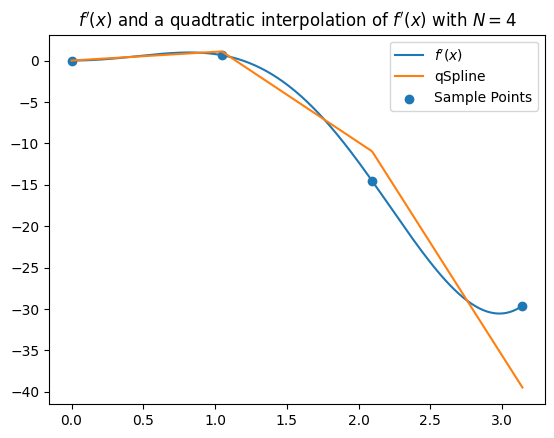

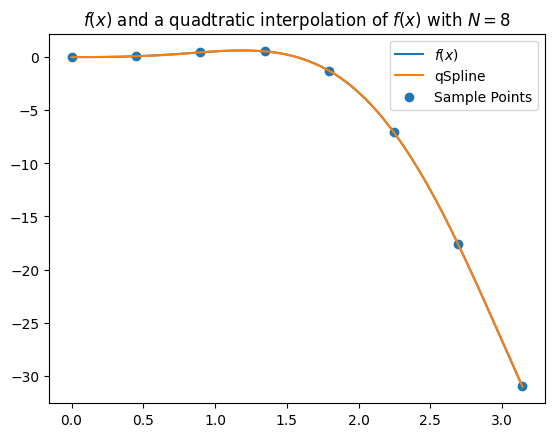

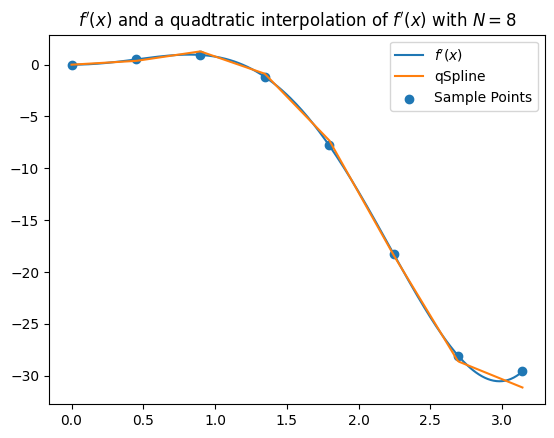

In [248]:
# YOUR CODE HERE
x_qs = np.linspace(0,np.pi,int(np.pi/0.01))

for N in [4,8]:
    x_sample = np.linspace(0, np.pi, N)

    plt.plot(x_qs, f(x_qs), label=r"$f(x)$")
    plt.plot(x_qs, Qspline(x_sample, f(x_sample), 0, x_qs)[0], label="qSpline")
    plt.scatter(x_sample, f(x_sample), label="Sample Points")
    plt.title(r"$f(x)$ and a quadtratic interpolation of $f(x)$ with $N=$" + f"{N}")
    plt.legend()
    plt.show()

    plt.plot(x_qs, fp(x_qs), label=r"$f^\prime(x)$")
    plt.plot(x_qs, Qspline(x_sample, f(x_sample), 0, x_qs)[1], label="qSpline")
    plt.scatter(x_sample, fp(x_sample), label="Sample Points")
    plt.title(r"$f^\prime(x)$ and a quadtratic interpolation of $f^\prime(x)$ with $N=$" + f"{N}")
    plt.legend()
    plt.show()

In [226]:
#Testing answer 


## Finite Difference Tables: 

Let $S_{N}^{k}$ denote the sum of
the $k$ th powers of the first $N$ integers i.e.:
$$
S_{N}^{k}=\sum\limits_{i=1}^{N}i^{k}
$$
Write a simple python program to evaluate these sums for a specified value
of $k$ and $N$. 


In [56]:
def Sum(N,k):
    return sum(pow(np.arange(1, N+1), k))

In [57]:
#Testing answer 
Sum(3,0)

np.int64(3)


Now write python code to form
the forward difference table (since the sample points are uniform). Notice
that for each value of $k$ the difference table terminates. Why does this
happen? Write the table as a 7 by 6 numpy array named A, with $A_{i,j}=-1$ if not defined.

|$N$ | $S_{N}^{k}$ | $\Delta f$ | $\Delta ^{2}f$ | $\Delta ^{3}f$ | $\Delta^{4}f$ | $\Delta ^{5}f$|
|----|----| ----| ----| ---- | ---- | ---- |
|0   | $A_{0,0}$ | $A_{0,1}$ | $A_{0,2}$ | $A_{0,3}$ | $A_{0,4}$ | $A_{0,5}$ |
|$\vdots$  | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$| $\vdots$ | $\vdots$ |
|6   | $A_{6,0}$ | $A_{6,1}$ | $A_{6,2}$ | $A_{6,3}$ | $A_{6,4}$ | $A_{6,5}$ |

    


In [58]:
# YOUR CODE HERE
def fwdDiffTable(func, m, n):
    A = -np.ones((m,n))

    for i in range(0,m):
        A[i, 0] = func(i+1)
    for j in range(1,n):
        for i in range(m-j):
            A[i,j] = A[i+1,j-1] - A[i, j-1]
    
    return A

k = 4
A = fwdDiffTable(lambda x : Sum(x, k), 7, 6)
print(A)

[[ 1.000e+00  1.600e+01  6.500e+01  1.100e+02  8.400e+01  2.400e+01]
 [ 1.700e+01  8.100e+01  1.750e+02  1.940e+02  1.080e+02  2.400e+01]
 [ 9.800e+01  2.560e+02  3.690e+02  3.020e+02  1.320e+02 -1.000e+00]
 [ 3.540e+02  6.250e+02  6.710e+02  4.340e+02 -1.000e+00 -1.000e+00]
 [ 9.790e+02  1.296e+03  1.105e+03 -1.000e+00 -1.000e+00 -1.000e+00]
 [ 2.275e+03  2.401e+03 -1.000e+00 -1.000e+00 -1.000e+00 -1.000e+00]
 [ 4.676e+03 -1.000e+00 -1.000e+00 -1.000e+00 -1.000e+00 -1.000e+00]]


In [59]:
### BEGIN TESTS
assert ('A' in vars() or 'A' in globals()), "Matrix not defined"
### END TESTS
#Testing answer 

For the special case $k=4$, extract the differences from your table
and use the Gregory-Newton finite difference formula to derive the formula:
$$
S_{N}^{4}=\sum\limits_{i=1}^{N}i^{4}=\frac{1}{5}N^{5}+\frac{1}{2}N^{4}+\frac{
1}{3}N^{3}-\frac{1}{30}N
$$

YOUR ANSWER HERE

\begin{gather*}
    S^4_N = f(N) = \sum\limits_{i=1}^{N}i^{4} \\
\end{gather*}

\begin{gather*}
    = &&S_1^4& \\
      &+& (N-1) &\Delta S_1^4& \\
      &+& \frac{(N-1) (N-2)}{2!} &\Delta^2 S_1^4& \\
      &+& \frac{(N-1) (N-2) (N-3)}{3!} &\Delta^3 S_1^4& \\
      &+& \frac{(N-1) (N-2) (N-3) (N-4)}{4!} &\Delta^4 S_1^4& \\
      &+& \frac{(N-1) (N-2) (N-3) (N-4) (N-5)}{5!} &\Delta^5 S_1^4& \\
      &+& ...
    \\
    \\
    = &&1& \\
      &+& (N-1)&16&  \\
      &+& \frac{N^2 -3N + 2}{2} &65& \\
      &+& \frac{-6 + 11 N - 6 N^2 + N^3}{6} &110& \\
      &+& \frac{24 - 50 N + 35 N^2 - 10 N^3 + N^4}{24} &84& \\
      &+& \frac{-120 + 274 N - 225 N^2 + 85 N^3 - 15 N^4 + N^5}{120} &24& \\
      &+& &0& 
    \\
    \\
    =   & &(1 - 16 + 65 - 110 + 84 - 24) & N^0  \\ 
        & + &\left(16 - \frac{195}{2} + \frac{1210}{6} - \frac{50(84)}{24} + \frac{274(24)}{120}\right) & N \\
        & + & \left(\frac{65}{2} -110 + \frac{35(84)}{24} - \frac{225(24)}{120} \right) & N^2 \\
        & + & \left(\frac{110}{6} - \frac{10(84)}{24} + \frac{85(24)}{120} \right)& N^3 \\
        & + &\left( \frac{84}{24} - \frac{15(24)}{120} \right) & N^4 \\
        & + & \frac{24}{120} & N^5 \\
    = && \frac{1}{5}N^{5}+\frac{1}{2}N^{4}+\frac{
1}{3}N^{3}-\frac{1}{30}N
    
\end{gather*}


## The pchip function in Python: 
Piecewise Cubic Hermite interpolation assumes the following representation of a given function $f(x)$
in terms of the cubic basis functions $h_{i}^{(0)}$ and $h_{i}^{(0)}:$
$$
f(x)\approx
h(x)=\sum\limits_{i=0}^{N}f(x_{i})h_{i}^{(0)}(x)+\sum\limits_{i=0}^{N}f^{^{
\prime }}(x_{i})h_{i}^{(0)}(x)
$$
where $h_{i}^{(0)}$ and $h_{i}^{(1)}$ are assumed to have the properties:

$$
\left. 
\begin{array}{rr}
h_{i}^{(0)}(x_{j})=\delta_{ij} & \frac{d}{dx}h_{i}^{(1)}(x_{j})=\delta _{ij}
\\ 
\frac{d}{dx}h_{i}^{(0)}(x_{j})=0 & h_{i}^{(1)}(x_{j})=0
\end{array}
\right\} \qquad (1)
$$



- (a) Show that the expressions for these basis functions are given by
$$
\begin{align}
h_{i}^{(0)}(x) &=&\frac{\left[ \Delta x_{i}+2\left( x-x_{i}\right) \right]
(x_{i+1}-x)^{2}}{(\Delta x_{i})^{3}} \\
h_{i+1}^{(0)}(x) &=&\frac{\left[ \Delta x_{i}+2\left( x_{i+1}-x\right) 
\right] (x-x_{i})^{2}}{(\Delta x_{i})^{3}} \\
h_{i}^{(1)}(x) &=&\frac{(x-x_{i})(x_{i+1}-x)^{2}}{(\Delta x_{i})^{2}} \\
h_{i+1}^{(1)}(x) &=&-\frac{(x_{i+1}-x)(x-x_{i})^{2}}{(\Delta x_{i})^{2}}
\end{align}
$$


Since each instance of $h_i^{(0)}(x)$ and $h_i^{(1)}(x)$ are only valid on $[x_i, x_{i+1}]$ we only need to check $x_j = x_i, x_{i+1}$

For $h^{(0)}_i(x)$:
\begin{gather*}
    h_{i}^{(0)}(x_j) &=& \frac{\left[ \Delta x_{i}+2\left( x_j-x_{i}\right) \right]
        (x_{i+1}-x_j)^{2}}{(\Delta x_{i})^{3}} &=& \left\{
        \begin{array}{rr}
        1 & i=j
        \\ 
        0 & j = i+1
        \end{array}
        \right. = \delta_{ij}
    \\
    \frac{d}{dx}h_{i}^{(0)}(x_j) &=& \frac{2(x_{i+1}-x_j)^{2} - 2\left[ \Delta x_{i}+2\left( x_j-x_{i}\right) \right]
        (x_{i+1}-x_j)}{(\Delta x_{i})^{3}} &=& \left\{
        \begin{array}{rr}
        0 & i=j
        \\ 
        0 & j = i+1
        \end{array}
        \right. = 0
    \\
    h_{i+1}^{(0)}(x_j) &=&\frac{\left[ \Delta x_{i}+2\left( x_{i+1}-x_j\right) 
        \right] (x_j-x_{i})^{2}}{(\Delta x_{i})^{3}}
        &=& \left\{
        \begin{array}{rr}
        0 & i=j
        \\ 
        1 & j = i+1
        \end{array}
        \right. = \delta_{(i+1)j}
    \\
    \frac{d}{dx} h_{i+1}^{(0)}(x_j) &=&\frac{2\left[ \Delta x_{i}+2\left( x_{i+1}-x_j\right) 
        \right] (x_j-x_{i}) - 2(x_j-x_{i})^{2}}{(\Delta x_{i})^{3}}
        &=& \left\{
        \begin{array}{rr}
        0 & i=j
        \\ 
        0 & j = i+1
        \end{array}
        \right. = 0
\end{gather*}
For $h^{(1)}_i(x)$:
\begin{gather*}
    h_{i}^{(1)}(x_j) &=& \frac{(x_j-x_{i})(x_{i+1}-x_j)^{2}}{(\Delta x_{i})^{2}} &=& \left\{
        \begin{array}{rr}
        0 & i=j
        \\ 
        0 & j = i+1
        \end{array}
        \right. = 0
    \\
    \frac{d}{dx}h_{i}^{(1)}(x_j) &=& \frac{(x_{i+1}-x_j)^{2} - 2(x_j-x_{i})(x_{i+1}-x_j)}{(\Delta x_{i})^{2}} &=& \left\{
        \begin{array}{rr}
        1 & i=j
        \\ 
        0 & j = i+1
        \end{array}
        \right. = \delta_{ij}
    \\
    h_{i+1}^{(1)}(x_j) &=&-\frac{(x_{i+1}-x_j)(x_j-x_{i})^{2}}{(\Delta x_{i})^{2}} &=& \left\{
        \begin{array}{rr}
        0 & i=j
        \\ 
        0 & j = i+1
        \end{array}
        \right. = 0
    \\
    \frac{d}{dx} h_{i+1}^{(1)}(x_j) &=&-\frac{2(x_{i+1}-x_j)(x_j-x_{i})-(x_j-x_{i})^{2}}{(\Delta x_{i})^{2}} &=& \left\{
        \begin{array}{rr}
        0 & i=j
        \\ 
        1 & j = i+1
        \end{array}
        \right. = \delta_{(i+1)j}
\end{gather*}


- (b) In order to specify the interpolant it is necessary to supply both the
function values $f(x_{i})$ and the derivatives $f^{\prime }(x_{i})$ at the
interpolation points. Write a python function `hermite`$(x,y,yp,xi)$
that will evaluate the Piecewise Cubic Hermite interpolant of a function
sampled at the points given by the vector $x$ and whose values and
derivatives are given by $y$ and $yp$ respectively. Let $xi$ be the set of
desired sample points. For the function $f(x)=\cos (4x)e^{-x^{5}}$ on the
interval $[0,1]$ plot the Piecewise Cubic Hermite interpolant and the
function $f$. 
Compare the value of the Piecewise Cubic Hermite interpolant
with the function at $x=0.5$ by sampling the function and its derivative at
only 6 uniformly distributed points and completing the table.

|$f(0.5)$ |  sh1|
|----|  ----|
|hermite(0.5) |  sh2|



In [249]:
sh1 = 0
sh2 = 0

def f(x):
    return np.cos(4*x) * np.exp(-x**5)

def fp(x):
    return -4*np.sin(4*x) * np.exp(-x**5) - 5*x**4 * np.cos(4*x) * np.exp(-x**5)


N = 6
x_interp = np.linspace(0, 1, 1000)
x_sample = np.linspace(0, 1, N)

def hermite(x, y, yp, xi):
    interp = []

    N = len(x)-1

    h0i = lambda x, x_k, x_k1 : ((x_k1-x_k) + 2*(x-x_k))*(x_k1-x)**2/(x_k1-x_k)**3
    h0i1 = lambda x, x_k, x_k1 : ((x_k1-x_k) + 2*(x_k1-x))*(x-x_k)**2/(x_k1-x_k)**3
    h1i = lambda x, x_k, x_k1 : (x-x_k)*(x_k1-x)**2/(x_k1-x_k)**2
    h1i1 = lambda x, x_k, x_k1 : -(x_k1-x)*(x-x_k)**2/(x_k1-x_k)**2

    # print(h0i)

    for i in xi:
        idx = min(max(np.searchsorted(x, i)-1, 0), N-1)

        interp.append(y[idx]*h0i(i, x[idx], x[idx+1]) 
                      + y[idx+1]*h0i1(i, x[idx], x[idx+1])
                      + yp[idx]*h1i(i, x[idx], x[idx+1])
                      + yp[idx+1]*h1i1(i, x[idx], x[idx+1])
                      )
        
    return interp
        


# YOUR CODE HERE
hermite(x_sample, f(x_sample), fp(x_sample), x_interp)
sh1 = f(0.5)
sh2 = hermite(x_sample, f(x_sample), fp(x_sample), [0.5])[0]



Plot under :


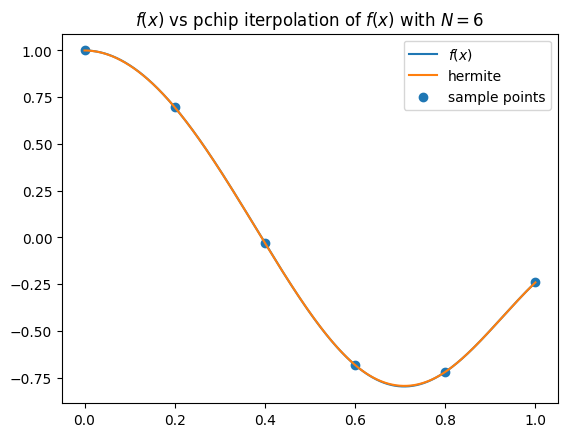

In [61]:
# YOUR CODE HERE
plt.plot(x_interp, f(x_interp), label=r"$f(x)$")
plt.plot(x_interp, hermite(x_sample, f(x_sample), fp(x_sample), x_interp), label="hermite")
plt.scatter(x_sample, f(x_sample), label="sample points")
plt.legend()
plt.title(r"$f(x)$ vs pchip iterpolation of $f(x)$ with $N=6$")
plt.show()

In [251]:
print("sh1:", sh1)
print("sh2:", sh2)
print("Error:", np.abs(sh1-sh2))

sh1: -0.40334334440368536
sh2: -0.4029700248281853
Error: 0.0003733195755000751


sh1 and sh2 are very close together, off by only 0.0003733195755000751

In [62]:
#Testing answer 


- (c) It is often not possible to provide the derivatives $f^{\prime
}(x_{i}) $ at the interpolation points.
Use Newton's divided difference formula to derive an approximate expression
for the derivatives $f_{k-1}^{\prime },$ $f_{k}^{\prime },$ and $
f_{k+1}^{\prime }$ of a function $f$ that is approximated by a quadratic
polynomial that interpolates $f$ at the three points $(x_{k-1},f_{k-1}),$ $
(x_{k},$ $f_{k})$ and $(x_{k+1},f_{k+1})$.



YOUR ANSWER HERE

Now use those formulae for the approximate
derivatives to approximate the required derivatives $
f^{\prime }(x_{i})$ by the derivatives of a local quadratic polynomial. For
the left endpoint of the interval use the formula for the derivative at $
x_{k-1},$ for the interior nodes use the formula for the approximate
derivative at $x_{k},$ and for the right endpoint use the formula for the
approximate derivative at $x_{k+1}.$ Similarly, write a python function `h_quadratic_deriv(x,y,xi)` (based on your `hermite` function) that evaluates this interpolation method.

In [63]:
def h_quadratic_deriv(x,y,xi):
    # YOUR CODE HERE
    raise NotImplementedError()


- (d) The `pchip_interpolate` routine in python (see the reference * below and this [link](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.interpolate.pchip_interpolate.html)) uses the
following scheme to approximate the derivatives at the interpolation points.
The slope at each interior node is taken to be the following weighted mean
of the slopes of the piecewise linear interpolant either side of the
interior point:
$$
f^{\prime }(x_{i})=\left\{ 
\begin{array}{c}
\frac{f[x_{i-1},x_{i}]f[x_{i},x_{i+1}]}{\alpha f[x_{i},x_{i+1}]+(1-\alpha
)f[x_{i-1},x_{i}]}\text{ if }f[x_{i-1},x_{i}]f[x_{i},x_{i+1}]>0 \\ 
0\text{ otherwise}
\end{array}
\right.
$$
where $\alpha =(\Delta x_{i-1}+2\Delta x_{i})/3(\Delta x_{i-1}+\Delta x_{i})$
and $\Delta x_{i}=x_{i+1}-x_{i}.$

Impose the quadratic one-sided derivative conditions at the two end points.
Now construct a `pchip` routine of your own to interpolate a function given
only nodal values, constructing the weighted derivative approximations at
the nodes and then calling your `hermite` routine. For the function $
f(x)=\cos (4x)e^{-x^{5}}$ on the interval $[0,1]$ plot $f,$ the the results
of your `hermite` code using the quadratic derivatives defined in
part (c), and those of your `pchip` code by sampling the function at
10 uniformly distributed points and provide a similar plot for 12 uniformly
distributed points. Complete the following table:

| - | $N=10$ | $N=12$ |
|----|----|----|
|$f(0.5)$ | s63 |  s64 |
|`h_quadratic_deriv`(0.5) |  s65 |  s66 |
|`pchip`(0.5) | s67 |  s68 |




(*) Reference: F.N Fritsch and J. \ Butland, ``A method for constructing
local monotone piecewise cubic interpolants'', SIAM J. Sci. Stat. Comput.
Vol 5, No 2, 1984.

In [64]:
s63 =0
s64 =0
s65 =0
s66 =0
s67 =0
s68 =0
# YOUR CODE HERE
raise NotImplementedError()


NotImplementedError: 


Plot under :


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Testing answer 


In [ ]:
#Testing answer 


In [ ]:
#Testing answer 
